In [2]:
# Welcome to the iPython notebook tutorial!

In [3]:
# You can write some Python code here and run it with Shift-Enter.
# The result of your last line of code gets printed out,
# so no more need for `print` statements!

x = 5
y = 3
x + y

8

In [4]:
# iPython remembers the variables you've used before.
x * y

15

In [5]:
# You can make functions too!

def square(x):
    return x * x

square(12)

144

In [6]:
# You can go back and edit a previous line, too.
# Can you turn the previous function `square` into `cube`?

In [7]:
# Let's play around with a real dataset.

In [8]:
# It's a best practice to import all your required packages up here.

import csv

In [9]:
# This is a handy recipe for turning a CSV into a 
# list of dictionaries - which are like structs in C
# or objects in JavaScript, if you're familiar with those.

concentration_data = []

with open('concentration-enrollment.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row['concentration'])
        # You can't just do `concentration_data = reader`
        # because the `reader` object disappears once the file
        # is read. Instead, you want to copy each row into
        # a different list.
        concentration_data.append(row)

African and African American Studies
Anthropology
Applied Mathematics
Astrophysics
Biochemical Sciences
Biomedical Engineering
Chemical and Physical Biology
Chemistry
Chemistry and Physics
Classics
Comparative Literature
Comparative Study of Religion
Computer Science
Earth and Planetary Sciences
East Asian Studies
Economics
Electrical Engineering
Engineering Sciences
English
Environmental Science and Public Policy
Folklore and Mythology
Germanic Languages and Literatures
Government
History
History and Literature
History and Science
History of Art and Architecture
Human Developmental and Regenerative Biology
Human Evolutionary Biology
Integrative Biology
Linguistics
Mathematics
Mechanical Engineering
Molecular and Cellular Biology
Music
Near Eastern Languages and Civilizations
Neurobiology
Organismic and Evolutionary Biology
Philosophy
Physics
Psychology
Romance Languages and Literatures
Sanskrit and Indian Studies
Slavic Languages and Literatures
Social Studies
Sociology
South Asian St

In [10]:
# Let's see what we got
concentration_data

[{'2010-11': '6',
  '2011-12': '7',
  '2012-13': '11',
  '2013-14': '10',
  '2014-15': '10',
  'concentration': 'African and African American Studies'},
 {'2010-11': '39',
  '2011-12': '34',
  '2012-13': '29',
  '2013-14': '15',
  '2014-15': '27',
  'concentration': 'Anthropology'},
 {'2010-11': '59',
  '2011-12': '49',
  '2012-13': '66',
  '2013-14': '65',
  '2014-15': '91',
  'concentration': 'Applied Mathematics'},
 {'2010-11': '6',
  '2011-12': '14',
  '2012-13': '3',
  '2013-14': '8',
  '2014-15': '11',
  'concentration': 'Astrophysics'},
 {'2010-11': '2',
  '2011-12': '1',
  '2012-13': '2',
  '2013-14': '0',
  '2014-15': '0',
  'concentration': 'Biochemical Sciences'},
 {'2010-11': '4',
  '2011-12': '11',
  '2012-13': '11',
  '2013-14': '17',
  '2014-15': '15',
  'concentration': 'Biomedical Engineering'},
 {'2010-11': '15',
  '2011-12': '16',
  '2012-13': '15',
  '2013-14': '14',
  '2014-15': '18',
  'concentration': 'Chemical and Physical Biology'},
 {'2010-11': '34',
  '2011-1

In [11]:
# We can now start crunching the numbers!

# Let's just see what the first piece of data looks like
# Each year corresponds with the number of concentrators in that concentration
# in that year.
aaas = concentration_data[0]

In [12]:
# Ew, it looks like the enrollment numbers are strings, not integers!
# That makes it harder to run calculations.
# Let's clean up this data.

def clean_concentration(raw):
    return dict([
        ('concentration', raw['concentration']),
        ('2010-11', int(raw['2010-11'])),
        ('2011-12', int(raw['2011-12'])),
        ('2012-13', int(raw['2012-13'])),
        ('2013-14', int(raw['2013-14'])),
        ('2014-15', int(raw['2014-15']))
    ])

clean_concentration(aaas)

{'2010-11': 6,
 '2011-12': 7,
 '2012-13': 11,
 '2013-14': 10,
 '2014-15': 10,
 'concentration': 'African and African American Studies'}

In [13]:
# That's better! Let's clean all the concentrations, then
clean_concentration_data = [clean_concentration(c) for c in concentration_data]

clean_concentration_data[0]

{'2010-11': 6,
 '2011-12': 7,
 '2012-13': 11,
 '2013-14': 10,
 '2014-15': 10,
 'concentration': 'African and African American Studies'}

In [14]:
# Let's see how many concentrators Computer Science added from 2010-2015.
# This is a trick to filter a list
computer_science = [c for c in clean_concentration_data if c['concentration'] == 'Computer Science'][0]
computer_science

{'2010-11': 36,
 '2011-12': 36,
 '2012-13': 52,
 '2013-14': 89,
 '2014-15': 98,
 'concentration': 'Computer Science'}

In [15]:
#####
# Now it's your turn to start working with the data!
#####

In [16]:
# Calculate the growth in CS concentrators from 2010-11 to 2014-15. 
new_cs_concentrators = computer_science['2014-15'] - computer_science['2010-11']
growth_percent = float(new_cs_concentrators) / computer_science['2010-11'] * 100

"CS added {} concentrators, for a growth rate of {} percent!".format(new_cs_concentrators, growth_percent)

'CS added 62 concentrators, for a growth rate of 172.222222222 percent!'

In [17]:
# Hey, that was cool. Why don't we do that for every concentration?

def get_growth(concentration):
    old = concentration['2010-11']
    new = concentration['2014-15']
    if old != 0:
        diff = float(new - old)
        return diff / old * 100

def summary_for_concentration(concentration):
    rate = get_growth(concentration)
    name = concentration["concentration"]
    if rate:
        return "{} added {} concentrators, for a growth rate of {} percent!".format(name, new_cs_concentrators, growth_percent)
    else:
        return "{} started with 0 concentrators; the growth rate is undefined.".format(name)

for c in clean_concentration_data:
    print summary_for_concentration(c)

African and African American Studies added 62 concentrators, for a growth rate of 172.222222222 percent!
Anthropology added 62 concentrators, for a growth rate of 172.222222222 percent!
Applied Mathematics added 62 concentrators, for a growth rate of 172.222222222 percent!
Astrophysics added 62 concentrators, for a growth rate of 172.222222222 percent!
Biochemical Sciences added 62 concentrators, for a growth rate of 172.222222222 percent!
Biomedical Engineering added 62 concentrators, for a growth rate of 172.222222222 percent!
Chemical and Physical Biology added 62 concentrators, for a growth rate of 172.222222222 percent!
Chemistry added 62 concentrators, for a growth rate of 172.222222222 percent!
Chemistry and Physics added 62 concentrators, for a growth rate of 172.222222222 percent!
Classics added 62 concentrators, for a growth rate of 172.222222222 percent!
Comparative Literature added 62 concentrators, for a growth rate of 172.222222222 percent!
Comparative Study of Religion a

In [18]:
# Things to do next:
# - Print the 5 largest concentrations.

def sort_size(data):
    final = []
    for concentration in data:
        current_size = concentration["2014-15"]
        name = concentration["concentration"]
        final.append((current_size, name))
    final.sort(reverse=True)
    return final

largest_size_concentrations = sort_size(clean_concentration_data)[:5]

largest_size_concentrations

[(183, 'Economics'),
 (148, 'Government'),
 (98, 'Computer Science'),
 (93, 'Psychology'),
 (91, 'Applied Mathematics')]

In [19]:
# - Print the 5 fastest-growing concentrations.

def sort_growth(data):
    final = []
    for concentration in data:
        name = concentration["concentration"]
        rate = get_growth(concentration)
        if rate:
            final.append((rate, name))
    final.sort(reverse=True)
    return final

largest_growing_concentrations = sort_growth(clean_concentration_data)[:5]

largest_growing_concentrations

[(275.0, 'Biomedical Engineering'),
 (230.76923076923075, 'Statistics'),
 (172.22222222222223, 'Computer Science'),
 (83.33333333333334, 'Astrophysics'),
 (66.66666666666666, 'African and African American Studies')]

In [20]:
# - Add the growth rate to each concentration's dict.

for concentration in clean_concentration_data:
    concentration["rate"] = get_growth(concentration)
    
clean_concentration_data

[{'2010-11': 6,
  '2011-12': 7,
  '2012-13': 11,
  '2013-14': 10,
  '2014-15': 10,
  'concentration': 'African and African American Studies',
  'rate': 66.66666666666666},
 {'2010-11': 39,
  '2011-12': 34,
  '2012-13': 29,
  '2013-14': 15,
  '2014-15': 27,
  'concentration': 'Anthropology',
  'rate': -30.76923076923077},
 {'2010-11': 59,
  '2011-12': 49,
  '2012-13': 66,
  '2013-14': 65,
  '2014-15': 91,
  'concentration': 'Applied Mathematics',
  'rate': 54.23728813559322},
 {'2010-11': 6,
  '2011-12': 14,
  '2012-13': 3,
  '2013-14': 8,
  '2014-15': 11,
  'concentration': 'Astrophysics',
  'rate': 83.33333333333334},
 {'2010-11': 2,
  '2011-12': 1,
  '2012-13': 2,
  '2013-14': 0,
  '2014-15': 0,
  'concentration': 'Biochemical Sciences',
  'rate': -100.0},
 {'2010-11': 4,
  '2011-12': 11,
  '2012-13': 11,
  '2013-14': 17,
  '2014-15': 15,
  'concentration': 'Biomedical Engineering',
  'rate': 275.0},
 {'2010-11': 15,
  '2011-12': 16,
  '2012-13': 15,
  '2013-14': 14,
  '2014-15': 18,

In [26]:
# - Write a new CSV that includes the growth rate for each concentration.

with open('concentration-growth.csv', 'w') as csvfile:
    fieldnames = ['concentration', '2010-11', '2011-12', '2012-13','2013-14','2014-15', 'rate']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(clean_concentration_data)

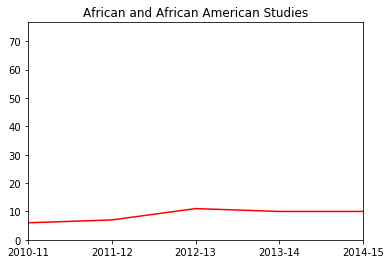

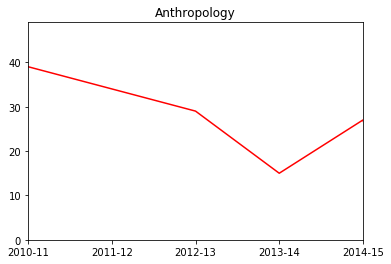

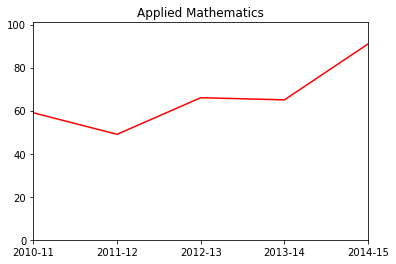

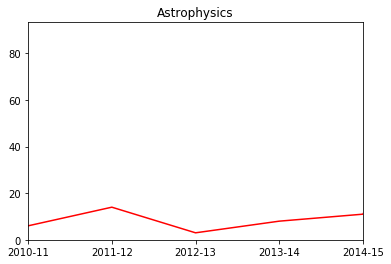

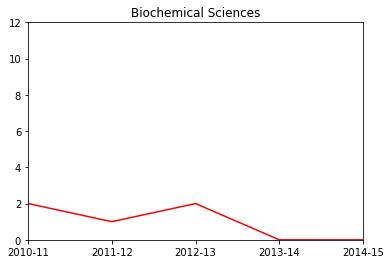

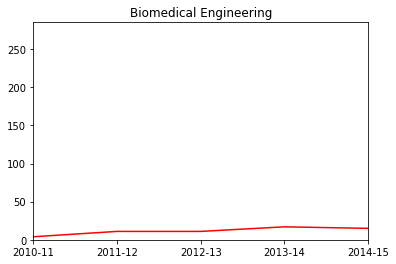

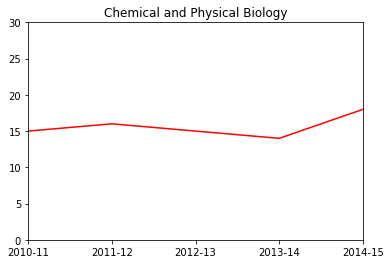

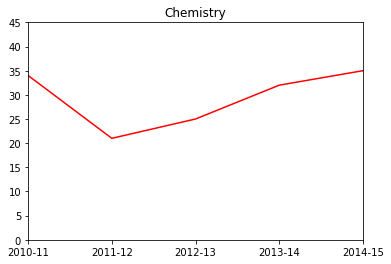

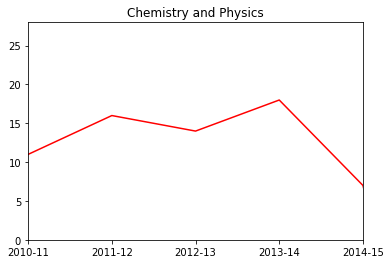

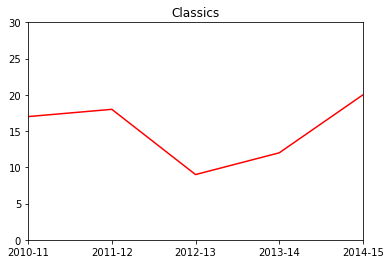

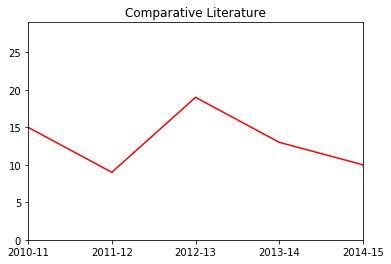

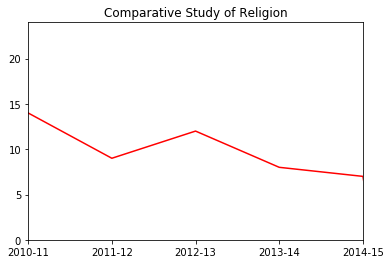

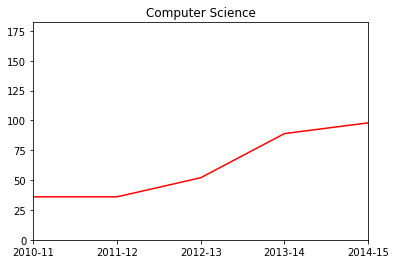

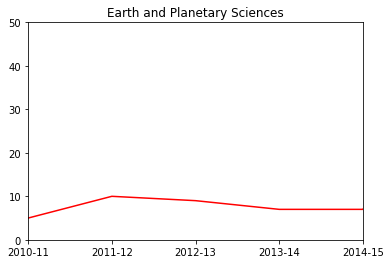

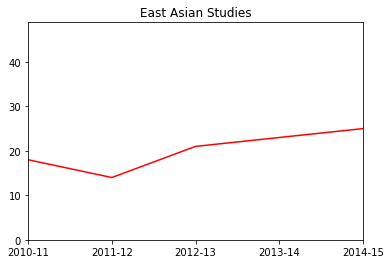

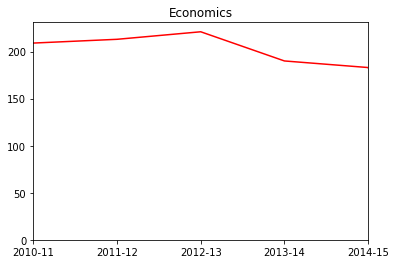

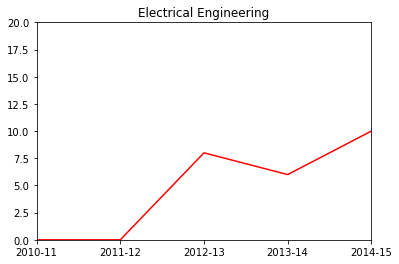

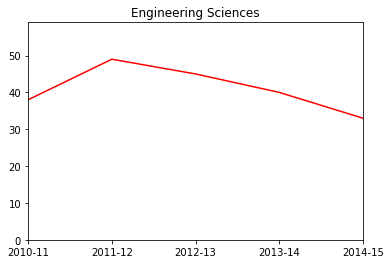

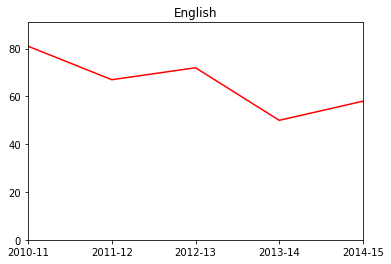

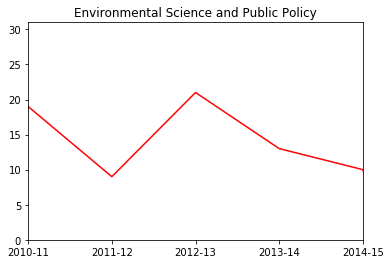

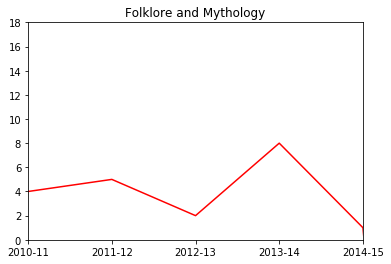

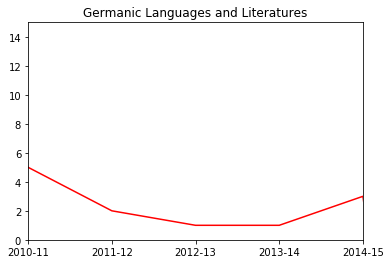

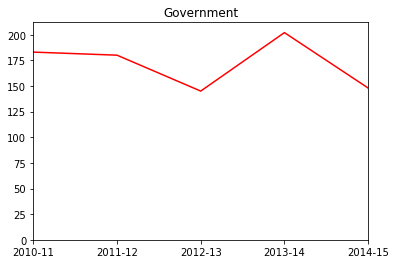

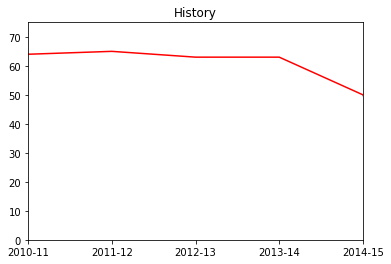

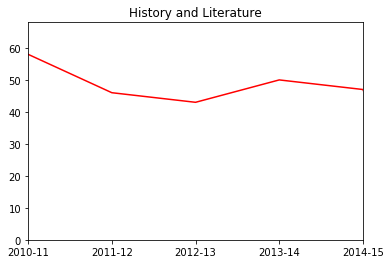

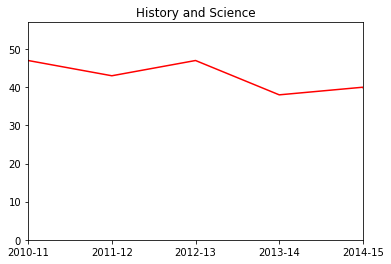

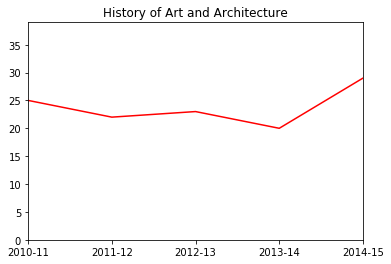

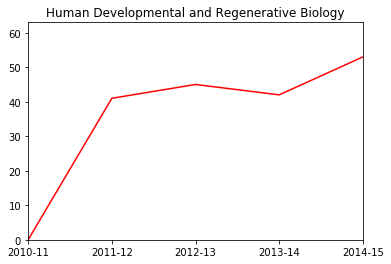

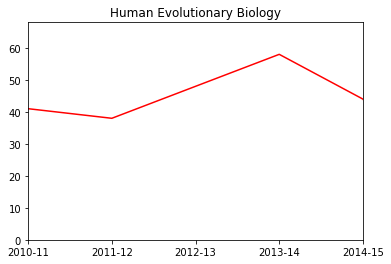

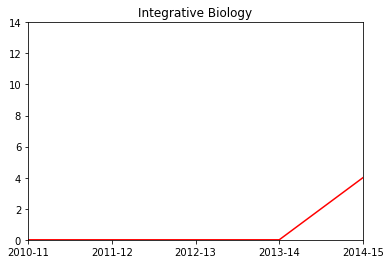

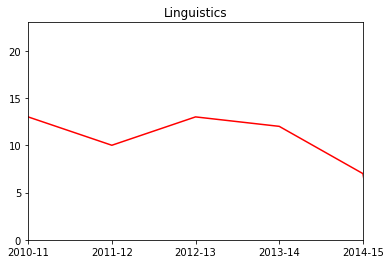

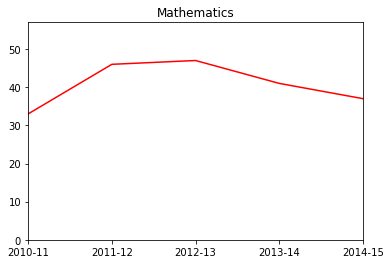

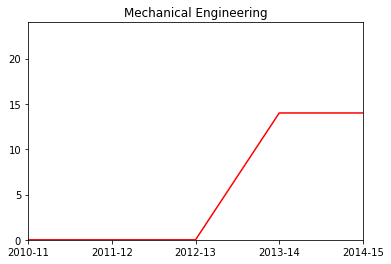

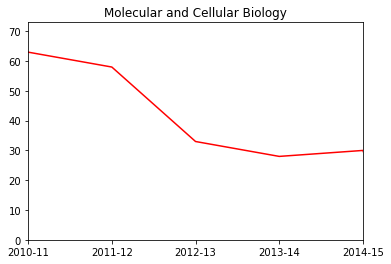

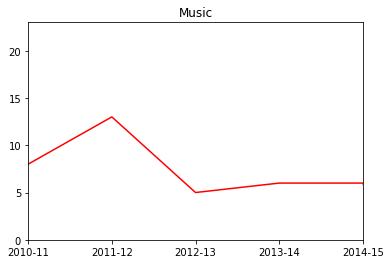

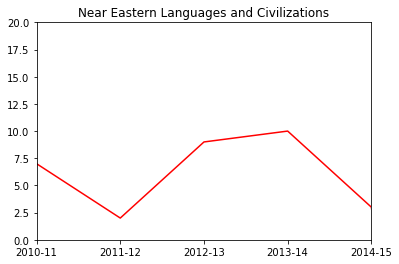

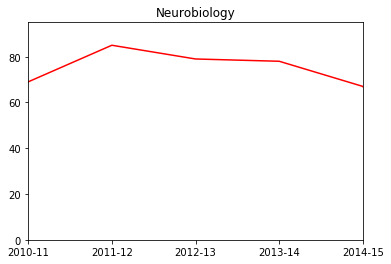

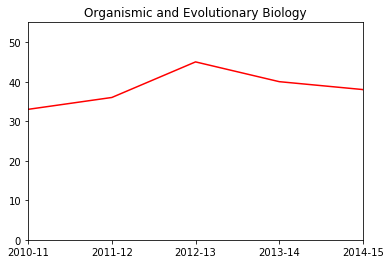

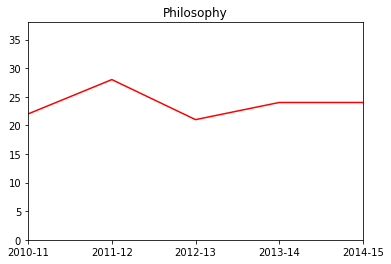

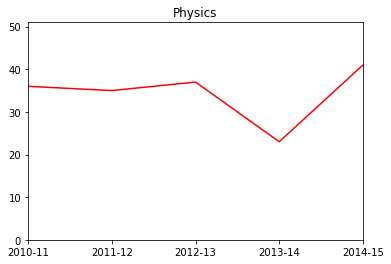

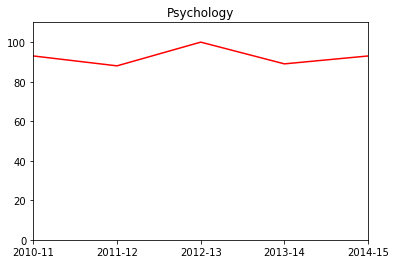

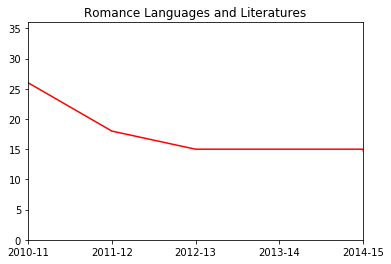

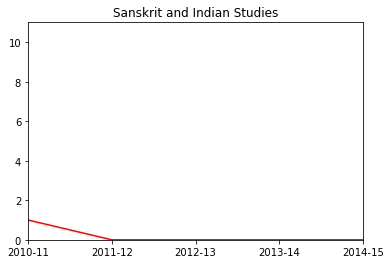

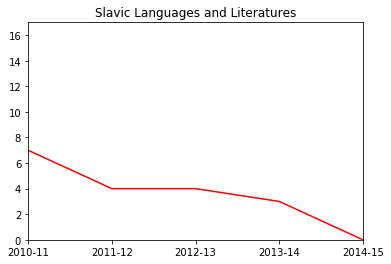

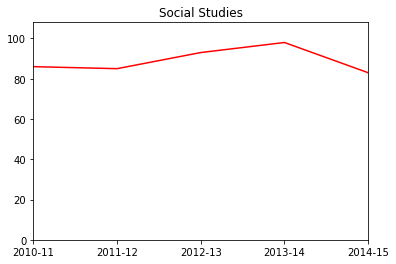

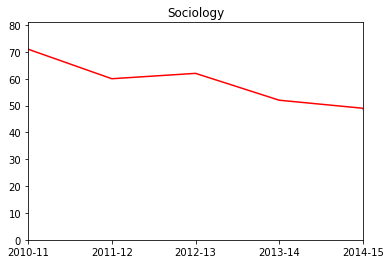

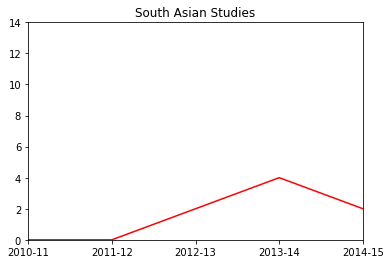

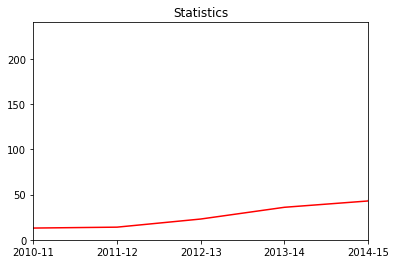

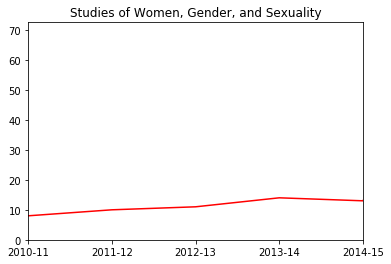

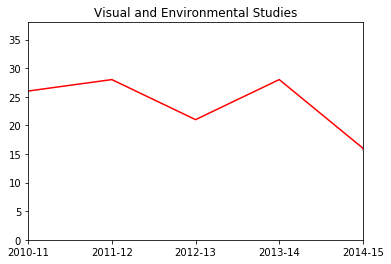

In [31]:
# If you're feeling ambitious:
# - Use matplotlib to make a graph.

import matplotlib.pyplot as plt

def graph_concentration(concentration):
    lst = []
    for key in concentration:
        if key != "concentration":
            lst.append((key, concentration[key]))
    lst.sort()
    labels = [x[0] for x in lst]
    numbers = [x[1] for x in lst]
    plt.plot(range(6), numbers, 'r')
    plt.title(concentration["concentration"])
    plt.axis([0, 4, 0, max(numbers) + 10])
    plt.xticks(range(5), labels)
    plt.show()

for c in clean_concentration_data:
    graph_concentration(c)
